# Variational Autoencoder with Sylvester Normalizing Flow applied on Frey Faces

In [1]:
import torch
import torch.utils.data as tdata
from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms

import scipy.io

from NF.autoencoders import VariationalAutoencoderOriginal, VariationalAutoencoderNormalizingFlow
from NF.transformations import PlanarTransformation, TriagSylvesterTransformation
from NF.training import train, test
from NF.utils import plot_image

In [13]:
# Prepare the data

DEVICE = 'cuda'

img_rows=28
img_cols=20
ff = scipy.io.loadmat('../data/frey/frey_rawface.mat')
ff = ff["ff"].T.reshape((-1, 1, img_rows, img_cols))
ff = ff.astype('float32')/255.

batch_size = 100
size = len(ff)

ff = ff[:int(size/batch_size)*batch_size]

ff_torch = torch.from_numpy(ff)

train_loader = tdata.DataLoader(ff_torch, batch_size=100, shuffle=True)
test_loader = tdata.DataLoader(
    ff_torch,
    batch_size=100, shuffle=True)

# a large batch will be used to compute average flow parameters after training
large_batch = []
for i, data in enumerate(train_loader):
    if i > 1000:
        break
    large_batch.append(data)
large_batch = torch.cat(large_batch).view(-1, 560).to(DEVICE)

In [6]:
sylv_vae = VariationalAutoencoderNormalizingFlow(560, 40, TriagSylvesterTransformation, 40, 16).to(DEVICE)
optimizer = optim.Adam(sylv_vae.parameters(), lr=1e-3)

Train Epoch: 1 [0/1900 (0%)]	Loss: 338.251055
====> Epoch: 1 Average loss: 338.8957


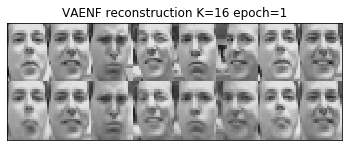

====> Test set loss: 17.8237
Train Epoch: 2 [0/1900 (0%)]	Loss: 338.319648
====> Epoch: 2 Average loss: 338.8793


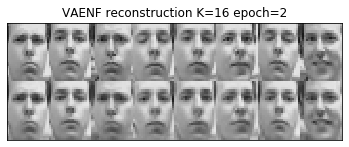

====> Test set loss: 17.8788
Train Epoch: 3 [0/1900 (0%)]	Loss: 340.064414
====> Epoch: 3 Average loss: 338.8861


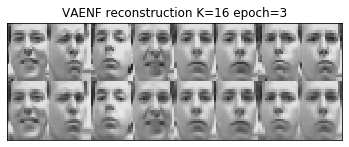

====> Test set loss: 17.8825
Train Epoch: 4 [0/1900 (0%)]	Loss: 338.089922
====> Epoch: 4 Average loss: 338.9008


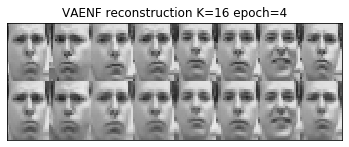

====> Test set loss: 17.8574
Train Epoch: 5 [0/1900 (0%)]	Loss: 338.038398
====> Epoch: 5 Average loss: 338.8089


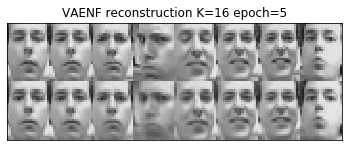

====> Test set loss: 17.8741
Train Epoch: 6 [0/1900 (0%)]	Loss: 338.237383
====> Epoch: 6 Average loss: 338.7141


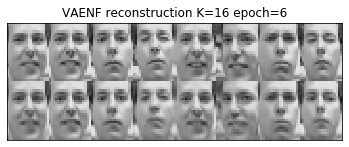

====> Test set loss: 17.7814
Train Epoch: 7 [0/1900 (0%)]	Loss: 338.803516
====> Epoch: 7 Average loss: 338.7001


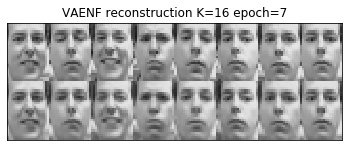

====> Test set loss: 17.8865
Train Epoch: 8 [0/1900 (0%)]	Loss: 339.187773
====> Epoch: 8 Average loss: 338.7487


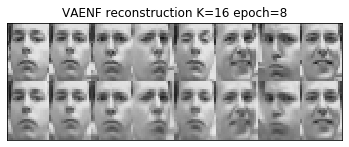

====> Test set loss: 17.8224
Train Epoch: 9 [0/1900 (0%)]	Loss: 339.283516
====> Epoch: 9 Average loss: 338.7833


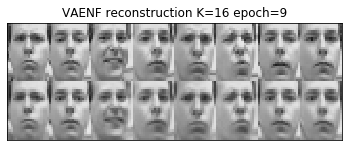

====> Test set loss: 17.7599
Train Epoch: 10 [0/1900 (0%)]	Loss: 339.260625
====> Epoch: 10 Average loss: 338.7646


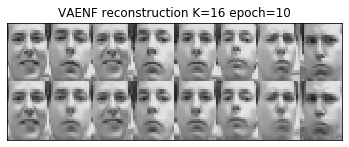

====> Test set loss: 17.8194


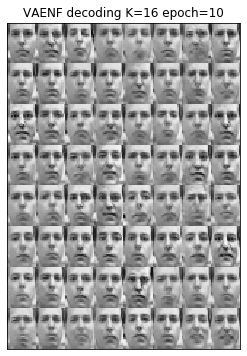

Train Epoch: 11 [0/1900 (0%)]	Loss: 338.881289
====> Epoch: 11 Average loss: 338.6667


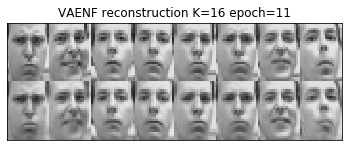

====> Test set loss: 17.8373
Train Epoch: 12 [0/1900 (0%)]	Loss: 339.218359
====> Epoch: 12 Average loss: 338.6359


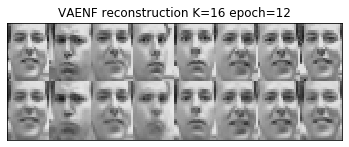

====> Test set loss: 17.7668
Train Epoch: 13 [0/1900 (0%)]	Loss: 338.283320
====> Epoch: 13 Average loss: 338.5898


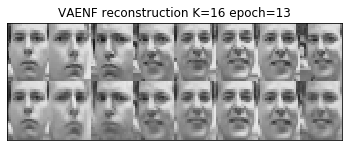

====> Test set loss: 17.8452
Train Epoch: 14 [0/1900 (0%)]	Loss: 338.009727
====> Epoch: 14 Average loss: 338.5330


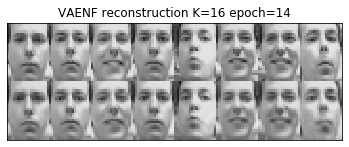

====> Test set loss: 17.8109
Train Epoch: 15 [0/1900 (0%)]	Loss: 338.678125
====> Epoch: 15 Average loss: 338.4993


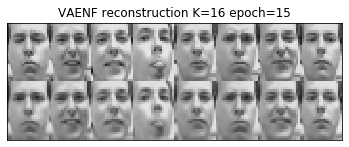

====> Test set loss: 17.8409
Train Epoch: 16 [0/1900 (0%)]	Loss: 337.864688
====> Epoch: 16 Average loss: 338.4791


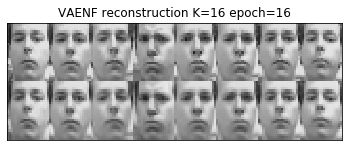

====> Test set loss: 17.7980
Train Epoch: 17 [0/1900 (0%)]	Loss: 337.819336
====> Epoch: 17 Average loss: 338.4702


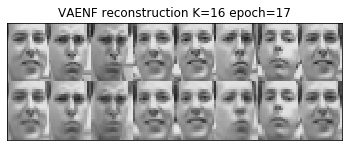

====> Test set loss: 17.8686
Train Epoch: 18 [0/1900 (0%)]	Loss: 338.344180
====> Epoch: 18 Average loss: 338.4685


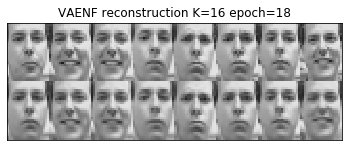

====> Test set loss: 17.8253
Train Epoch: 19 [0/1900 (0%)]	Loss: 338.799375
====> Epoch: 19 Average loss: 338.4024


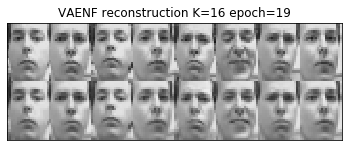

====> Test set loss: 17.8240
Train Epoch: 20 [0/1900 (0%)]	Loss: 338.202266
====> Epoch: 20 Average loss: 338.3935


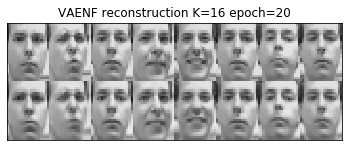

====> Test set loss: 17.8072


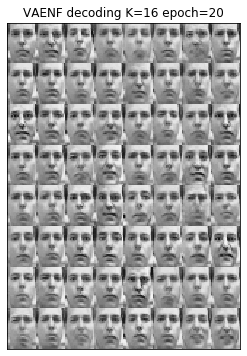

Train Epoch: 21 [0/1900 (0%)]	Loss: 338.521914
====> Epoch: 21 Average loss: 338.3801


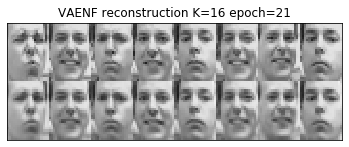

====> Test set loss: 17.8387
Train Epoch: 22 [0/1900 (0%)]	Loss: 338.563555
====> Epoch: 22 Average loss: 338.4401


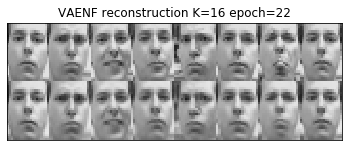

====> Test set loss: 17.8603
Train Epoch: 23 [0/1900 (0%)]	Loss: 339.060469
====> Epoch: 23 Average loss: 338.4223


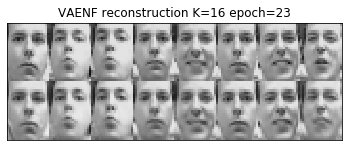

====> Test set loss: 17.8467
Train Epoch: 24 [0/1900 (0%)]	Loss: 338.260195
====> Epoch: 24 Average loss: 338.3919


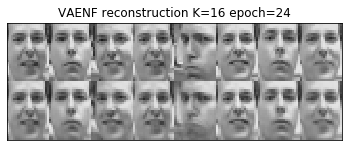

====> Test set loss: 17.8597
Train Epoch: 25 [0/1900 (0%)]	Loss: 338.453594
====> Epoch: 25 Average loss: 338.4079


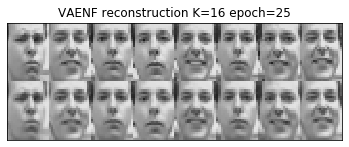

====> Test set loss: 17.7743
Train Epoch: 26 [0/1900 (0%)]	Loss: 338.872109
====> Epoch: 26 Average loss: 338.6012


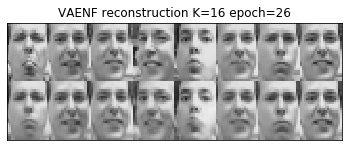

====> Test set loss: 17.8517
Train Epoch: 27 [0/1900 (0%)]	Loss: 339.081406
====> Epoch: 27 Average loss: 339.0081


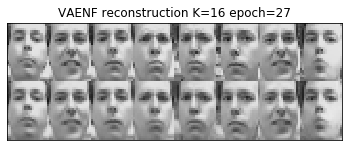

====> Test set loss: 17.8069
Train Epoch: 28 [0/1900 (0%)]	Loss: 338.726562
====> Epoch: 28 Average loss: 338.8184


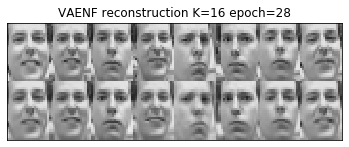

====> Test set loss: 17.8160
Train Epoch: 29 [0/1900 (0%)]	Loss: 338.714102
====> Epoch: 29 Average loss: 338.6213


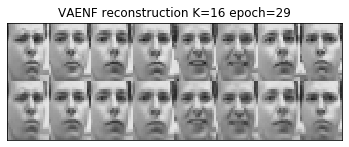

====> Test set loss: 17.8431
Train Epoch: 30 [0/1900 (0%)]	Loss: 338.257930
====> Epoch: 30 Average loss: 338.5145


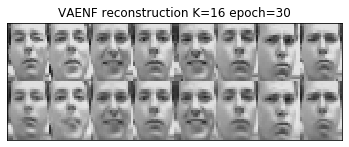

====> Test set loss: 17.8464


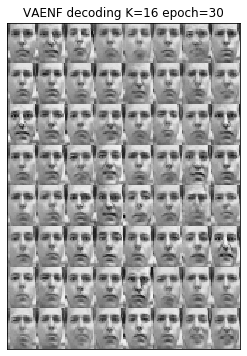

Train Epoch: 31 [0/1900 (0%)]	Loss: 338.334648
====> Epoch: 31 Average loss: 338.4193


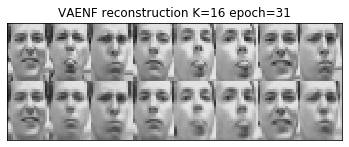

====> Test set loss: 17.8056
Train Epoch: 32 [0/1900 (0%)]	Loss: 337.589688
====> Epoch: 32 Average loss: 338.3548


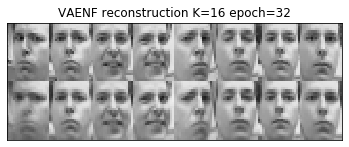

====> Test set loss: 17.8631
Train Epoch: 33 [0/1900 (0%)]	Loss: 337.476445
====> Epoch: 33 Average loss: 338.2944


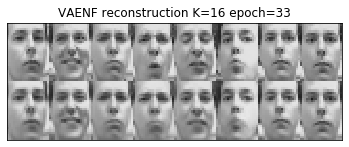

====> Test set loss: 17.8501
Train Epoch: 34 [0/1900 (0%)]	Loss: 337.896680
====> Epoch: 34 Average loss: 338.2857


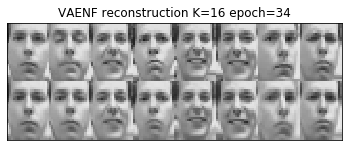

====> Test set loss: 17.8029
Train Epoch: 35 [0/1900 (0%)]	Loss: 339.154141
====> Epoch: 35 Average loss: 338.3448


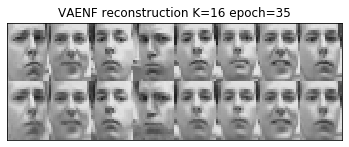

====> Test set loss: 17.8122
Train Epoch: 36 [0/1900 (0%)]	Loss: 338.160312
====> Epoch: 36 Average loss: 338.2829


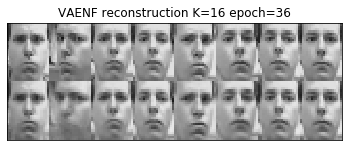

====> Test set loss: 17.7940
Train Epoch: 37 [0/1900 (0%)]	Loss: 337.797891
====> Epoch: 37 Average loss: 338.1978


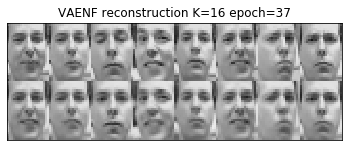

====> Test set loss: 17.7609
Train Epoch: 38 [0/1900 (0%)]	Loss: 337.542773
====> Epoch: 38 Average loss: 338.1746


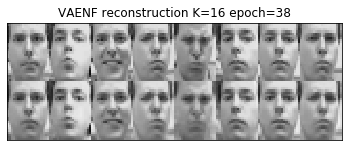

====> Test set loss: 17.8505
Train Epoch: 39 [0/1900 (0%)]	Loss: 337.446523
====> Epoch: 39 Average loss: 338.2707


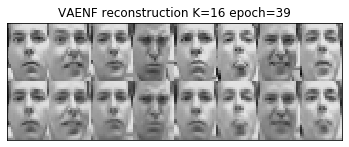

====> Test set loss: 17.8257
Train Epoch: 40 [0/1900 (0%)]	Loss: 337.518711
====> Epoch: 40 Average loss: 338.2739


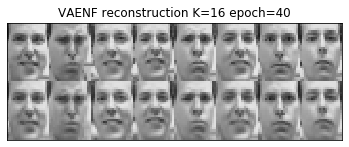

====> Test set loss: 17.8170


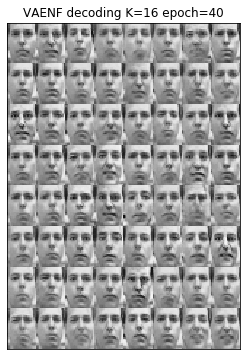

Train Epoch: 41 [0/1900 (0%)]	Loss: 337.274688
====> Epoch: 41 Average loss: 338.2153


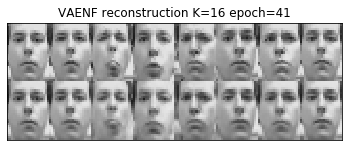

====> Test set loss: 17.7655
Train Epoch: 42 [0/1900 (0%)]	Loss: 337.768008
====> Epoch: 42 Average loss: 338.1773


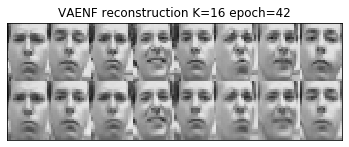

====> Test set loss: 17.8435
Train Epoch: 43 [0/1900 (0%)]	Loss: 337.947969
====> Epoch: 43 Average loss: 338.1816


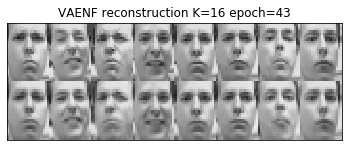

====> Test set loss: 17.8650
Train Epoch: 44 [0/1900 (0%)]	Loss: 340.181562
====> Epoch: 44 Average loss: 338.1650


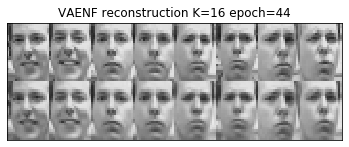

====> Test set loss: 17.8542
Train Epoch: 45 [0/1900 (0%)]	Loss: 337.939297
====> Epoch: 45 Average loss: 338.3347


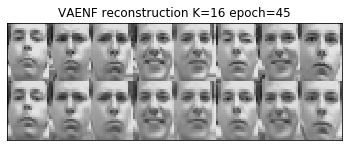

====> Test set loss: 17.7626
Train Epoch: 46 [0/1900 (0%)]	Loss: 339.009805
====> Epoch: 46 Average loss: 338.4171


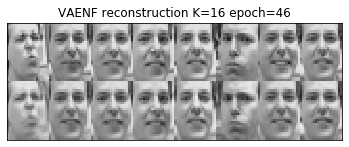

====> Test set loss: 17.7379
Train Epoch: 47 [0/1900 (0%)]	Loss: 338.043125
====> Epoch: 47 Average loss: 338.3139


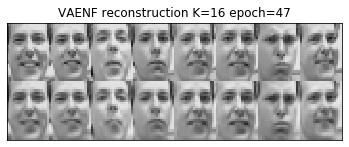

====> Test set loss: 17.7656
Train Epoch: 48 [0/1900 (0%)]	Loss: 338.663398
====> Epoch: 48 Average loss: 338.2429


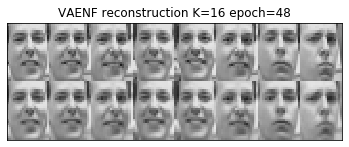

====> Test set loss: 17.8061
Train Epoch: 49 [0/1900 (0%)]	Loss: 338.868477
====> Epoch: 49 Average loss: 338.2130


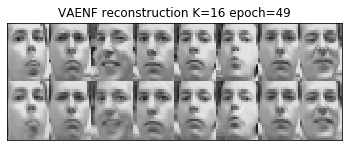

====> Test set loss: 17.7896
Train Epoch: 50 [0/1900 (0%)]	Loss: 338.395625
====> Epoch: 50 Average loss: 338.1475


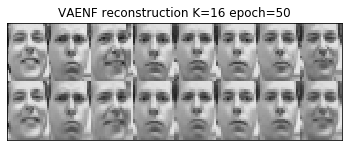

====> Test set loss: 17.8438


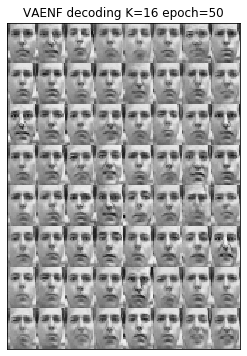

Train Epoch: 51 [0/1900 (0%)]	Loss: 337.843516
====> Epoch: 51 Average loss: 338.1336


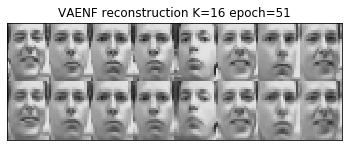

====> Test set loss: 17.7854
Train Epoch: 52 [0/1900 (0%)]	Loss: 338.352383
====> Epoch: 52 Average loss: 338.0336


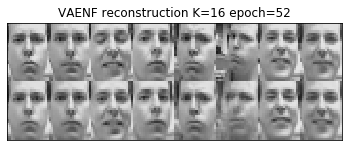

====> Test set loss: 17.7908
Train Epoch: 53 [0/1900 (0%)]	Loss: 338.225781
====> Epoch: 53 Average loss: 338.0170


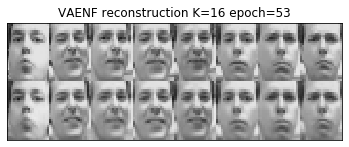

====> Test set loss: 17.8070
Train Epoch: 54 [0/1900 (0%)]	Loss: 337.833086
====> Epoch: 54 Average loss: 337.9494


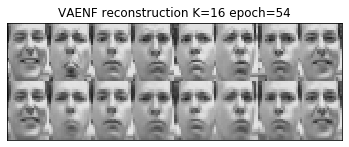

====> Test set loss: 17.7884
Train Epoch: 55 [0/1900 (0%)]	Loss: 337.820508
====> Epoch: 55 Average loss: 337.9617


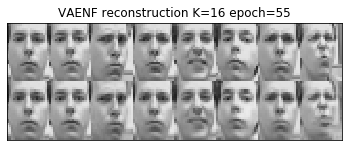

====> Test set loss: 17.7351
Train Epoch: 56 [0/1900 (0%)]	Loss: 339.063438
====> Epoch: 56 Average loss: 338.8535


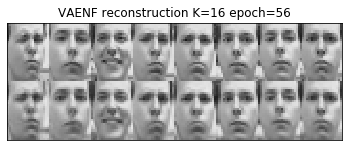

====> Test set loss: 17.8426
Train Epoch: 57 [0/1900 (0%)]	Loss: 339.535391
====> Epoch: 57 Average loss: 338.6526


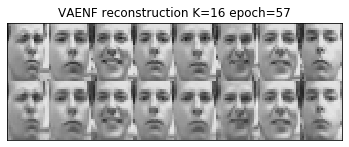

====> Test set loss: 17.8291
Train Epoch: 58 [0/1900 (0%)]	Loss: 338.438398
====> Epoch: 58 Average loss: 338.4319


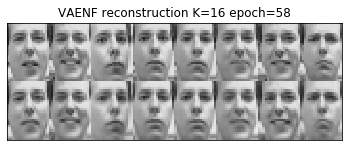

====> Test set loss: 17.7986
Train Epoch: 59 [0/1900 (0%)]	Loss: 338.173594
====> Epoch: 59 Average loss: 338.2280


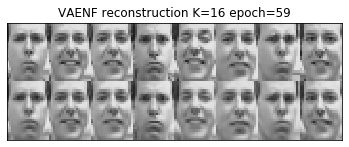

====> Test set loss: 17.8211
Train Epoch: 60 [0/1900 (0%)]	Loss: 338.296992
====> Epoch: 60 Average loss: 338.1283


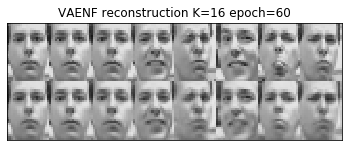

====> Test set loss: 17.7743


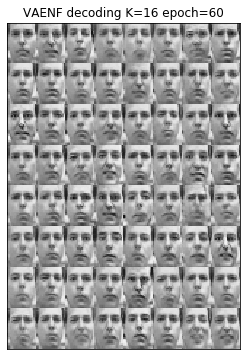

Train Epoch: 61 [0/1900 (0%)]	Loss: 337.909648
====> Epoch: 61 Average loss: 338.0879


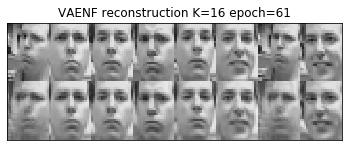

====> Test set loss: 17.7602
Train Epoch: 62 [0/1900 (0%)]	Loss: 338.840117
====> Epoch: 62 Average loss: 338.0086


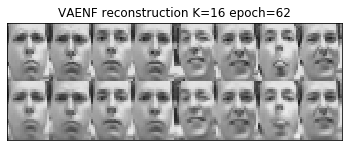

====> Test set loss: 17.8379
Train Epoch: 63 [0/1900 (0%)]	Loss: 338.772617
====> Epoch: 63 Average loss: 337.9853


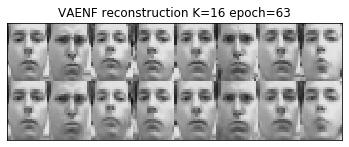

====> Test set loss: 17.7949
Train Epoch: 64 [0/1900 (0%)]	Loss: 338.617344
====> Epoch: 64 Average loss: 337.9360


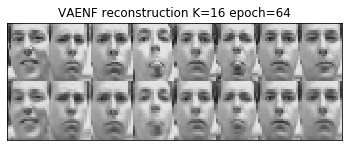

====> Test set loss: 17.7475
Train Epoch: 65 [0/1900 (0%)]	Loss: 338.118398
====> Epoch: 65 Average loss: 337.9304


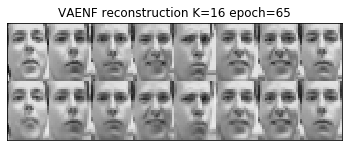

====> Test set loss: 17.8413
Train Epoch: 66 [0/1900 (0%)]	Loss: 338.148867
====> Epoch: 66 Average loss: 337.9214


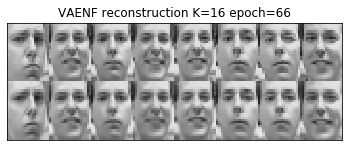

====> Test set loss: 17.7331
Train Epoch: 67 [0/1900 (0%)]	Loss: 336.909141
====> Epoch: 67 Average loss: 337.8950


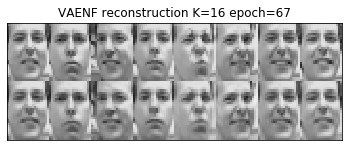

====> Test set loss: 17.8288
Train Epoch: 68 [0/1900 (0%)]	Loss: 337.200430
====> Epoch: 68 Average loss: 337.8712


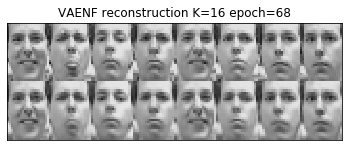

====> Test set loss: 17.7665
Train Epoch: 69 [0/1900 (0%)]	Loss: 338.571406
====> Epoch: 69 Average loss: 337.9906


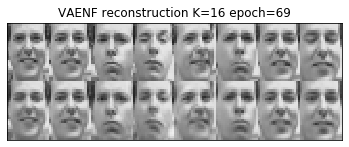

====> Test set loss: 17.7865
Train Epoch: 70 [0/1900 (0%)]	Loss: 337.733398
====> Epoch: 70 Average loss: 338.0941


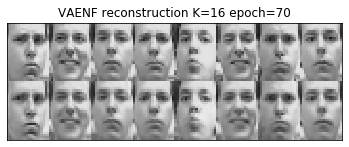

====> Test set loss: 17.7655


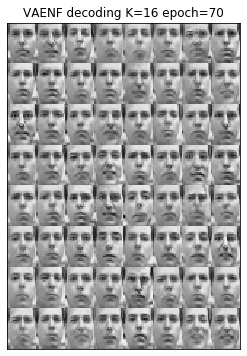

Train Epoch: 71 [0/1900 (0%)]	Loss: 338.316836
====> Epoch: 71 Average loss: 338.0028


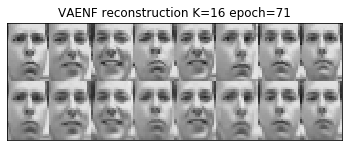

====> Test set loss: 17.8169
Train Epoch: 72 [0/1900 (0%)]	Loss: 337.638398
====> Epoch: 72 Average loss: 337.9094


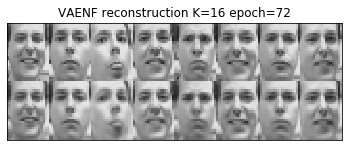

====> Test set loss: 17.8159
Train Epoch: 73 [0/1900 (0%)]	Loss: 338.897344
====> Epoch: 73 Average loss: 337.8608


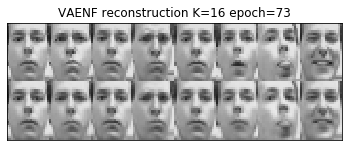

====> Test set loss: 17.7550
Train Epoch: 74 [0/1900 (0%)]	Loss: 337.662578
====> Epoch: 74 Average loss: 337.8111


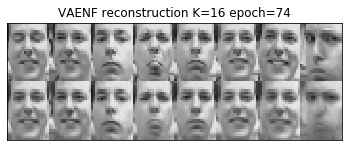

====> Test set loss: 17.7943
Train Epoch: 75 [0/1900 (0%)]	Loss: 336.781172
====> Epoch: 75 Average loss: 337.7989


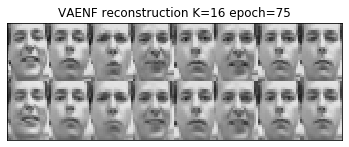

====> Test set loss: 17.7437
Train Epoch: 76 [0/1900 (0%)]	Loss: 337.084648
====> Epoch: 76 Average loss: 337.8142


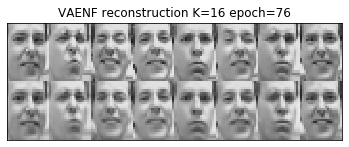

====> Test set loss: 17.7585
Train Epoch: 77 [0/1900 (0%)]	Loss: 337.950938
====> Epoch: 77 Average loss: 338.7387


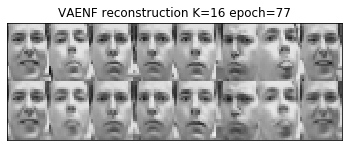

====> Test set loss: 17.8743
Train Epoch: 78 [0/1900 (0%)]	Loss: 339.247734
====> Epoch: 78 Average loss: 339.0694


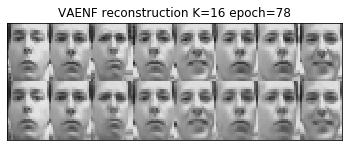

====> Test set loss: 17.8586
Train Epoch: 79 [0/1900 (0%)]	Loss: 338.727539
====> Epoch: 79 Average loss: 338.8102


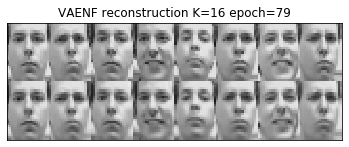

====> Test set loss: 17.8585
Train Epoch: 80 [0/1900 (0%)]	Loss: 339.024453
====> Epoch: 80 Average loss: 338.6125


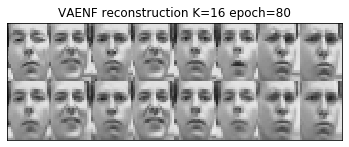

====> Test set loss: 17.7762


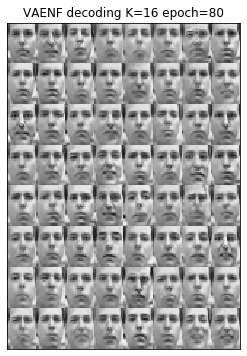

Train Epoch: 81 [0/1900 (0%)]	Loss: 337.771250
====> Epoch: 81 Average loss: 338.4484


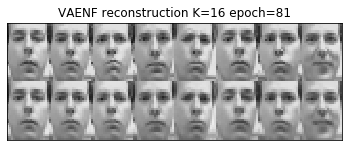

====> Test set loss: 17.7898
Train Epoch: 82 [0/1900 (0%)]	Loss: 339.177891
====> Epoch: 82 Average loss: 338.3019


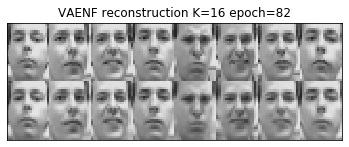

====> Test set loss: 17.7970
Train Epoch: 83 [0/1900 (0%)]	Loss: 337.582617
====> Epoch: 83 Average loss: 338.2301


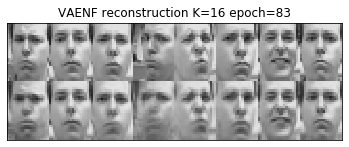

====> Test set loss: 17.8231
Train Epoch: 84 [0/1900 (0%)]	Loss: 338.135898
====> Epoch: 84 Average loss: 338.1428


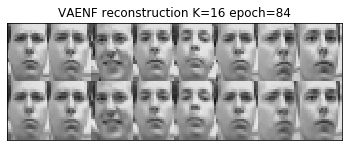

====> Test set loss: 17.8537
Train Epoch: 85 [0/1900 (0%)]	Loss: 338.182422
====> Epoch: 85 Average loss: 338.0628


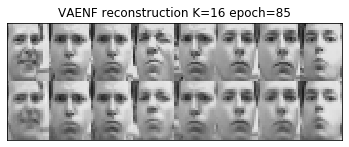

====> Test set loss: 17.8097
Train Epoch: 86 [0/1900 (0%)]	Loss: 337.318008
====> Epoch: 86 Average loss: 337.9859


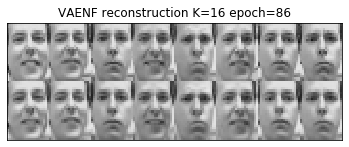

====> Test set loss: 17.7632
Train Epoch: 87 [0/1900 (0%)]	Loss: 337.723320
====> Epoch: 87 Average loss: 337.9370


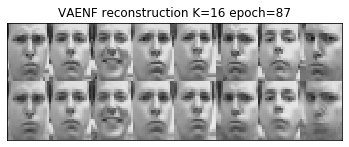

====> Test set loss: 17.7533
Train Epoch: 88 [0/1900 (0%)]	Loss: 338.050156
====> Epoch: 88 Average loss: 337.9173


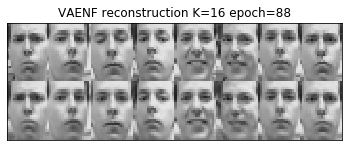

====> Test set loss: 17.7913
Train Epoch: 89 [0/1900 (0%)]	Loss: 337.906250
====> Epoch: 89 Average loss: 337.8566


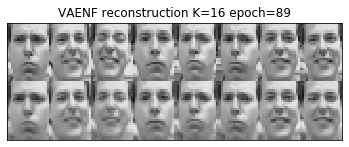

====> Test set loss: 17.8419
Train Epoch: 90 [0/1900 (0%)]	Loss: 338.586797
====> Epoch: 90 Average loss: 337.8499


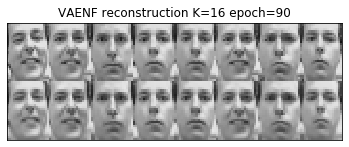

====> Test set loss: 17.8175


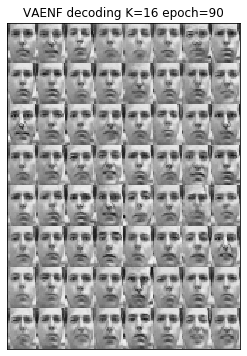

Train Epoch: 91 [0/1900 (0%)]	Loss: 337.320820
====> Epoch: 91 Average loss: 337.8365


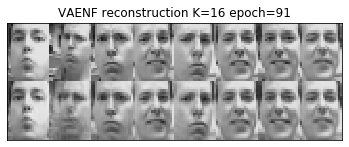

====> Test set loss: 17.8075
Train Epoch: 92 [0/1900 (0%)]	Loss: 337.842656
====> Epoch: 92 Average loss: 337.8200


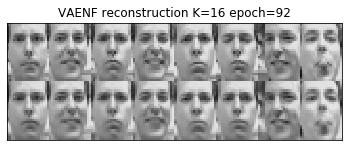

====> Test set loss: 17.7958
Train Epoch: 93 [0/1900 (0%)]	Loss: 338.051953
====> Epoch: 93 Average loss: 337.7841


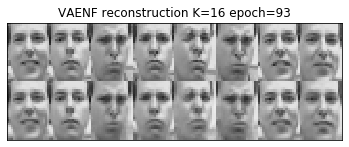

====> Test set loss: 17.7349
Train Epoch: 94 [0/1900 (0%)]	Loss: 338.668242
====> Epoch: 94 Average loss: 337.7457


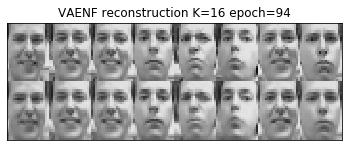

====> Test set loss: 17.7496
Train Epoch: 95 [0/1900 (0%)]	Loss: 339.086875
====> Epoch: 95 Average loss: 337.7289


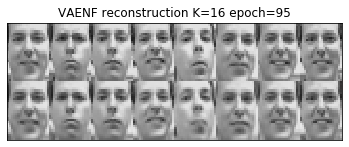

====> Test set loss: 17.7668
Train Epoch: 96 [0/1900 (0%)]	Loss: 338.151289
====> Epoch: 96 Average loss: 337.6761


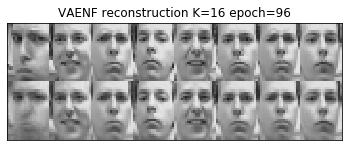

====> Test set loss: 17.7924
Train Epoch: 97 [0/1900 (0%)]	Loss: 337.606602
====> Epoch: 97 Average loss: 337.6475


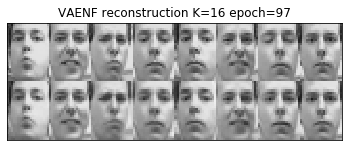

====> Test set loss: 17.7729
Train Epoch: 98 [0/1900 (0%)]	Loss: 337.338203
====> Epoch: 98 Average loss: 337.6667


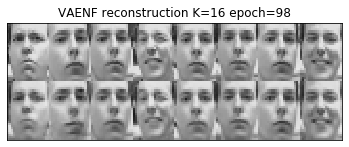

====> Test set loss: 17.8036
Train Epoch: 99 [0/1900 (0%)]	Loss: 335.513711
====> Epoch: 99 Average loss: 338.1055


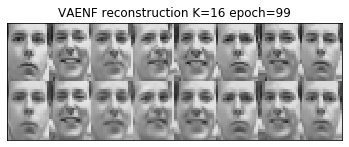

====> Test set loss: 17.7704
Train Epoch: 100 [0/1900 (0%)]	Loss: 339.587148
====> Epoch: 100 Average loss: 338.5863


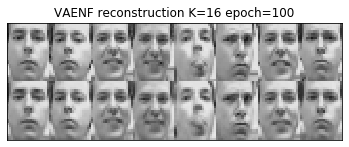

====> Test set loss: 17.8006


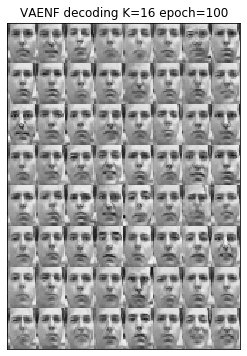

Train Epoch: 101 [0/1900 (0%)]	Loss: 338.958281
====> Epoch: 101 Average loss: 338.4389


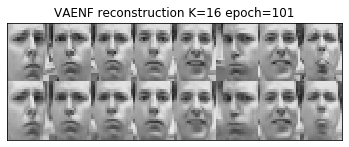

====> Test set loss: 17.8092
Train Epoch: 102 [0/1900 (0%)]	Loss: 337.089219
====> Epoch: 102 Average loss: 338.2666


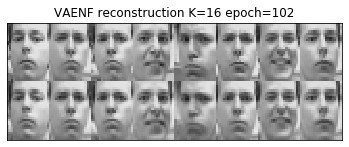

====> Test set loss: 17.8021
Train Epoch: 103 [0/1900 (0%)]	Loss: 337.812578
====> Epoch: 103 Average loss: 338.0750


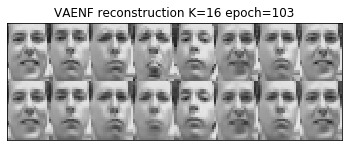

====> Test set loss: 17.7853
Train Epoch: 104 [0/1900 (0%)]	Loss: 337.973750
====> Epoch: 104 Average loss: 337.9695


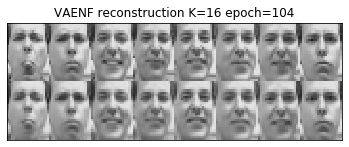

====> Test set loss: 17.7998
Train Epoch: 105 [0/1900 (0%)]	Loss: 337.307773
====> Epoch: 105 Average loss: 337.9035


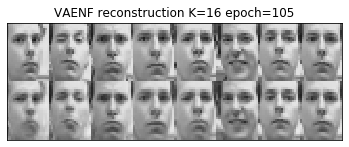

====> Test set loss: 17.7606
Train Epoch: 106 [0/1900 (0%)]	Loss: 337.640117
====> Epoch: 106 Average loss: 337.8592


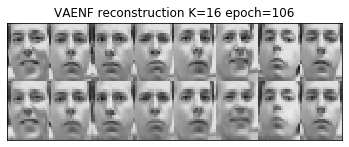

====> Test set loss: 17.7723
Train Epoch: 107 [0/1900 (0%)]	Loss: 338.317187
====> Epoch: 107 Average loss: 337.7697


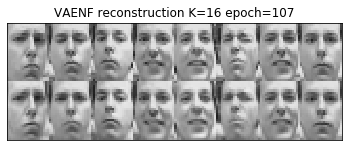

====> Test set loss: 17.8205
Train Epoch: 108 [0/1900 (0%)]	Loss: 337.379180
====> Epoch: 108 Average loss: 337.7423


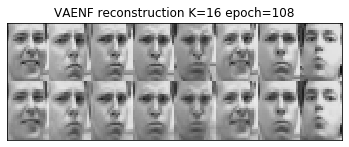

====> Test set loss: 17.7729
Train Epoch: 109 [0/1900 (0%)]	Loss: 337.717188
====> Epoch: 109 Average loss: 337.7414


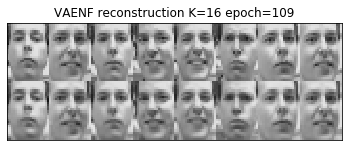

====> Test set loss: 17.7453
Train Epoch: 110 [0/1900 (0%)]	Loss: 337.995234
====> Epoch: 110 Average loss: 337.6571


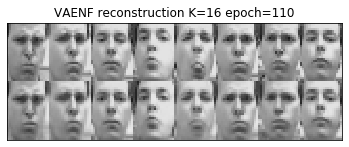

====> Test set loss: 17.7409


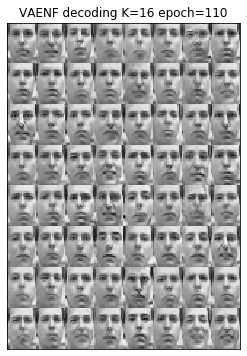

In [14]:
sample = torch.randn(64, 40, device=DEVICE)
for epoch in range(1, 110 + 1):
    train(epoch, sylv_vae, optimizer, train_loader, DEVICE)
    test(epoch, sylv_vae, optimizer, test_loader, DEVICE)
    if epoch % 10 == 0:
        with torch.no_grad():
            _ , _, params = sylv_vae.encode(large_batch)
            #sample = torch.randn(64, 20).to(device)
            sample_dec = sylv_vae.decode( sylv_vae.flow.forward( sample, params ) )
            plot_image(sample_dec.view(64, 1, 28, 20),
                'VAENF decoding K=' + str(sylv_vae.flow.K) + " epoch=" + str(epoch), figsize=[6, 6], padding=0)

In [20]:
# play around with modifications in latent space
mod_faces = ff_torch[:64]

In [25]:
mod_faces.shape

torch.Size([64, 1, 28, 20])

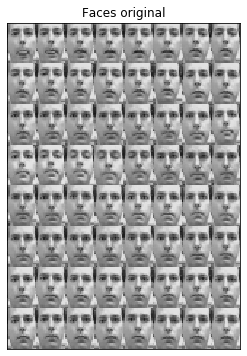

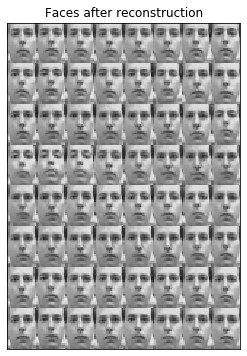

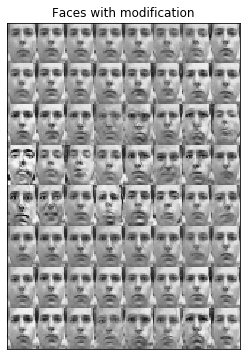

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


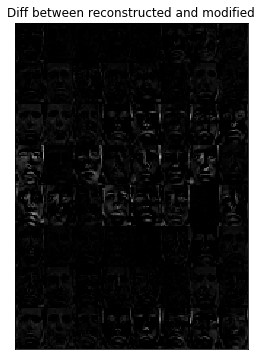

In [31]:
with torch.no_grad():
    plot_image(mod_faces, 'Faces original', figsize=[6,6], padding=0)
    mod_faces_dev = mod_faces.reshape(-1,img_cols * img_rows).to(DEVICE)
    mu, logvar, params = sylv_vae.encode(mod_faces_dev)
    z = sylv_vae.flow.forward(sylv_vae.reparameterize(mu, logvar), params)
    z_mod = z.clone()
    for i in range(64):
        z_mod[i, i%40] += 5.
    #sample = torch.randn(64, 20).to(device)
    mod_faces_dec = sylv_vae.decode( z_mod )
    no_mod_faces_dec = sylv_vae.decode( z )
    plot_image(no_mod_faces_dec.view(64, 1, 28, 20),
        'Faces after reconstruction', figsize=[6, 6], padding=0)
    plot_image(mod_faces_dec.view(64, 1, 28, 20),
        'Faces with modification', figsize=[6, 6], padding=0)
    plot_image((mod_faces_dec-no_mod_faces_dec).view(64, 1, 28, 20),
        'Diff between reconstructed and modified', figsize=[6, 6], padding=0)

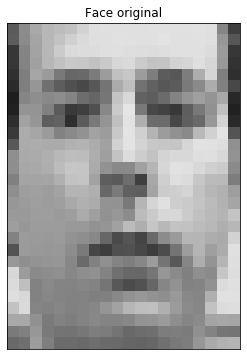

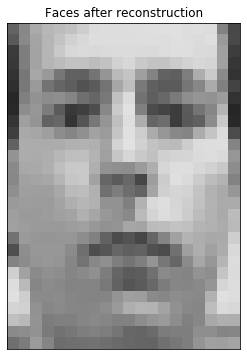

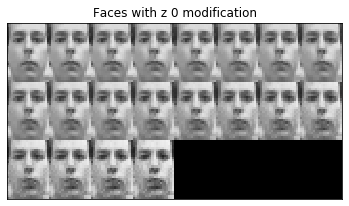

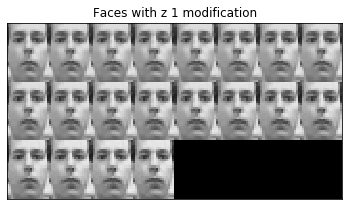

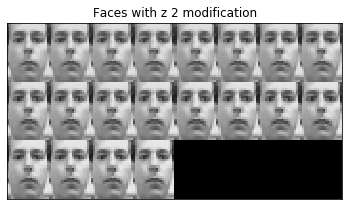

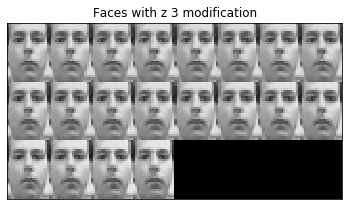

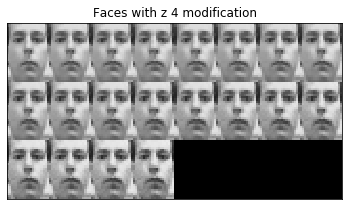

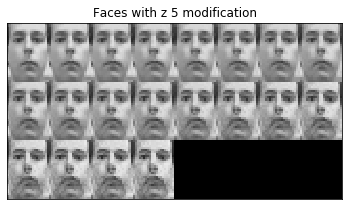

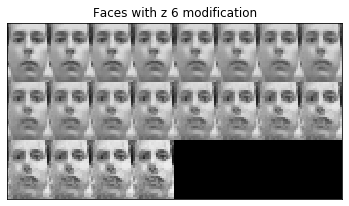

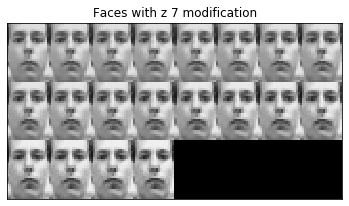

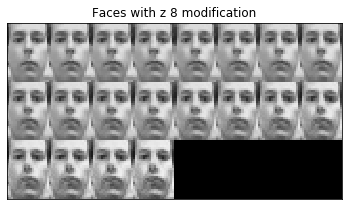

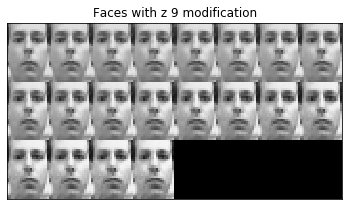

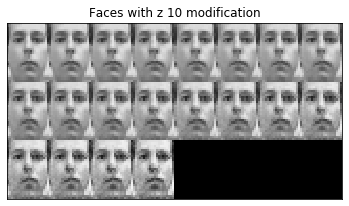

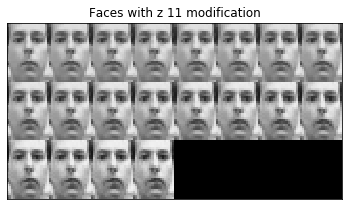

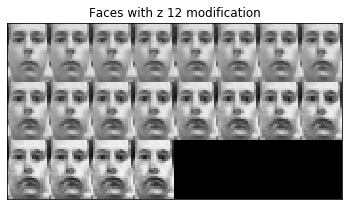

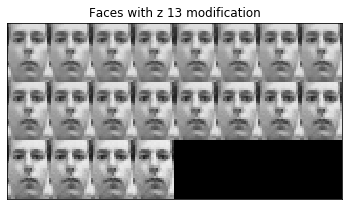

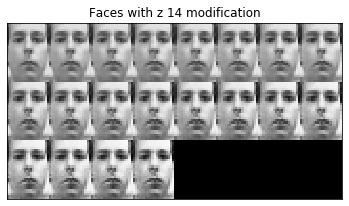

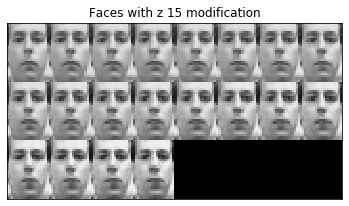

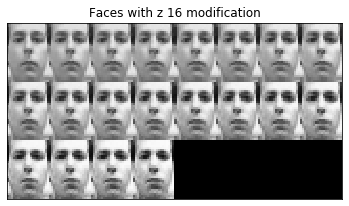

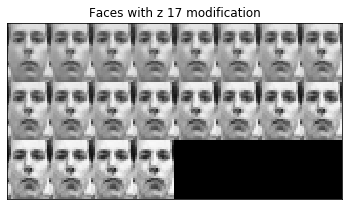

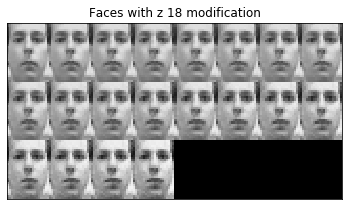

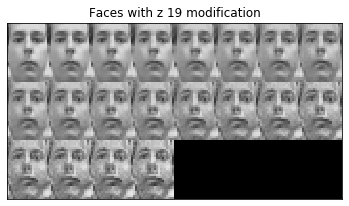

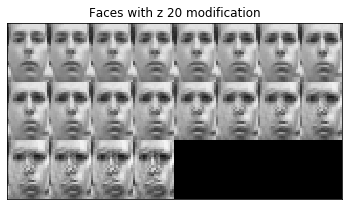

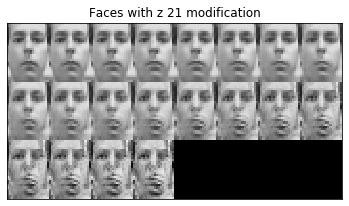

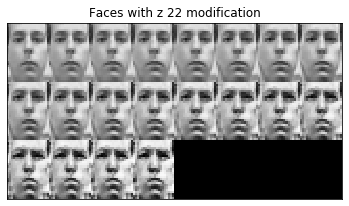

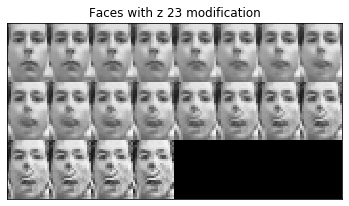

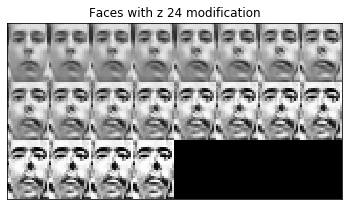

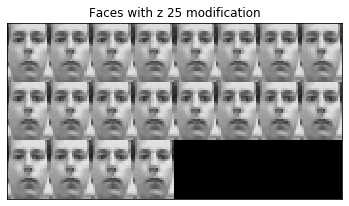

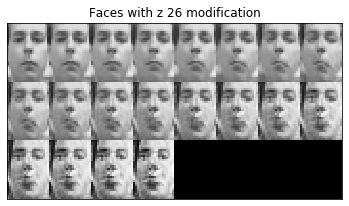

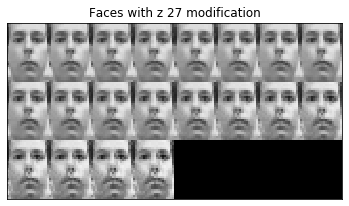

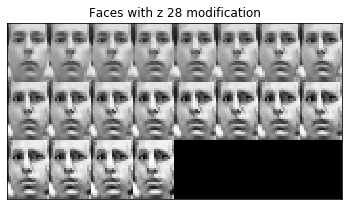

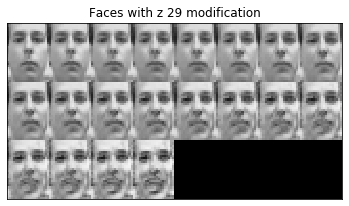

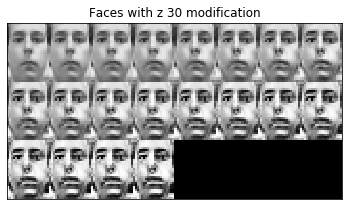

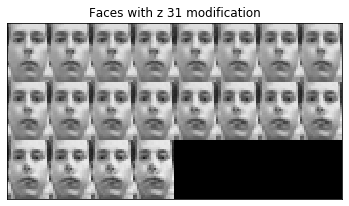

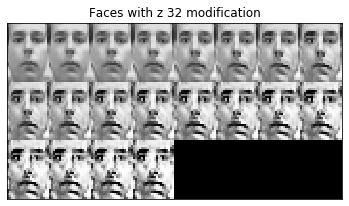

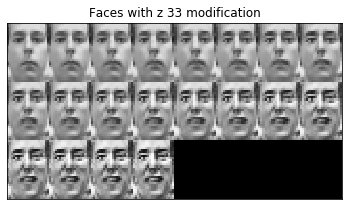

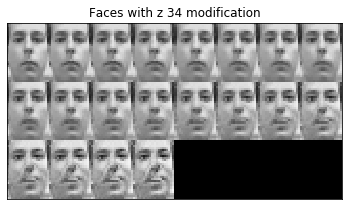

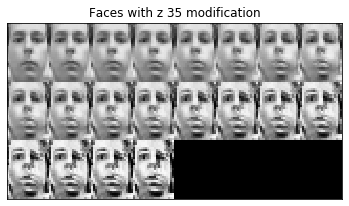

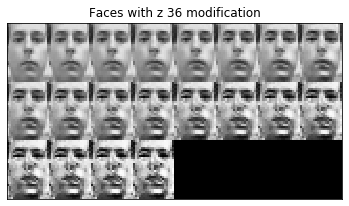

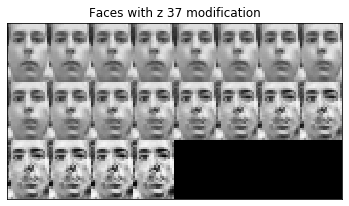

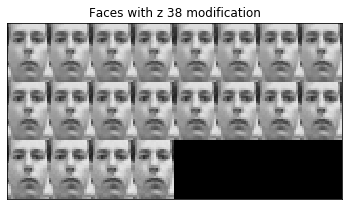

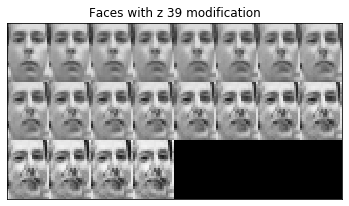

In [40]:
neut_mod_face = ff_torch[12]
z_to_emo = {key:'z '+str(key) for key in range(40)}
with torch.no_grad():
    plot_image(neut_mod_face, 'Face original', figsize=[6,6], padding=0)
    mod_faces_dev = neut_mod_face.reshape(-1,img_cols * img_rows).to(DEVICE)
    mu, logvar, params = sylv_vae.encode(mod_faces_dev)
    z = sylv_vae.flow.forward(sylv_vae.reparameterize(mu, logvar), params)
    z_mod = {key :z.clone() for key in z_to_emo.keys()}
    no_mod_faces_dec = sylv_vae.decode( z )
    plot_image(no_mod_faces_dec.view(1, 1, 28, 20),
        'Faces after reconstruction', figsize=[6, 6], padding=0)
    mod_faces_dec = {key:[] for key in z_to_emo.keys()}
    for i in range(20):
        for j in z_to_emo.keys():
            z_mod[j][0,j] += 0.5
            mod_faces_dec[j].append(sylv_vae.decode( z_mod[j] ))
    for j, emo in z_to_emo.items():
        plot_image(torch.cat(mod_faces_dec[j]).view(20, 1, 28, 20),
            'Faces with {} modification'.format(emo), figsize=[6, 6], padding=0)
#         plot_image((mod_faces_dec-no_mod_faces_dec).view(1, 1, 28, 20),
#             'Diff between reconstructed and {} modified'.format(emo), figsize=[6, 6], padding=0)